<a href="https://colab.research.google.com/github/prajapatsur/Predicting-Medical-Expenses-with-Linear-Regression/blob/main/Predicting_Medical_Expenses_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following topics are covered in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top.

## Problem Statement

This tutorial takes a practical and coding-focused. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
>
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:

 1. ???
 2. ???
 3. ???
 4. ???
 5. ???


## Downloading the Data

To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

In [1]:
data_url="https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(data_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ea608282710>)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Analysis and VIsualisation

In [ ]:
#imports
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Age

In [ ]:
fig= px.histogram(df, x='age', nbins=47, title='Age Distribution', marginal='box')
fig.update_layout(bargap=0.1)   #introducing bargap
fig.show()

### Body Mass Index

In [ ]:
fig= px.histogram(df, x='bmi', nbins=47, color="sex", title='BMI based on SEX Distribution ', marginal='box', color_discrete_sequence=['orange','grey'])
fig.update_layout(bargap=0.1)   #introducing bargap
fig.show()

### Charges

In [ ]:
fig= px.histogram(df, x='charges', nbins=47, color="smoker", title='Charges based on Smoker Distribution ', marginal='box', color_discrete_sequence=['red','grey'])
fig.update_layout(bargap=0.1)   #introducing bargap
fig.show()

There is a big difference of annual expenses between smokers and non-smokers can be oberserved. Non-smokers spend around 7.35K monthly while the smokers spend around 34.45K monthly on medical expenses.

In [ ]:
fig= px.histogram(df, x='charges', nbins=47, color="sex", title='Charges based on SEX Distribution ', marginal='box', color_discrete_sequence=['orange','grey'])
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig= px.scatter(df,
                x="age",
                y="charges",
                color="smoker",
                title="Age vs Charges based on Smoker",
                opacity=0.8,
                trendline="ols",
                hover_data=['sex'])
fig.update_traces(marker_size=10)
fig.show()

We can make obervations from about chart:<br>
- generally, the medical expenses increases with age
- lowest --> 18 year old non-smoker male with medical expenses of 1,122
- highest --> 54 year old smoker female with medical expenses of 63,770



EXERCISE: Identify whether smoking is more increasing charges for female or male?

In [ ]:
# prompt: dentify whether smoking is more increasing charges for female or male using graphs?

fig = px.scatter(df,
                 x="age",
                 y="charges",
                 color="smoker",
                 facet_col="sex",  # Separate plots for male and female
                 title="Age vs Charges based on Smoker (by Sex)",
                 opacity=0.8,
                 trendline="ols",
                 hover_data=['sex'])
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
smoker_female_count = df[(df['sex']=="female") & (df['smoker']=="yes")].sex.count()
total_female=df[df.sex=="female"].sex.count()
print(f"Female Smokers {smoker_female_count}\nFemale {total_female}")
print(f"Percentage of Female smokers is {(smoker_female_count/total_female)*100}%")
print(f"Percentage of smoker females who are paying more than 30k monthly medical chages: {df[(df['sex'] == 'female') & (df['smoker'] == 'yes') & (df['charges'] > 30000)].sex.count()/smoker_female_count*100}\n\n")

smoker_male_count = df[(df['sex']=="male") & (df['smoker']=="yes")].sex.count()
total_male=df[df.sex=="male"].sex.count()
print(f"Male Smokers {smoker_male_count}\nMale {total_male}")
print(f"Percentage of male smokers is {(smoker_male_count/total_male)*100}%")
print(f"Percentage of smoker males who are paying more than 30k monthly medical chages: {df[(df['sex'] == 'male') & (df['smoker'] == 'yes') & (df['charges'] > 30000)].sex.count()/smoker_male_count*100}")
#

Female Smokers 115
Female 662
Percentage of Female smokers is 17.371601208459214%
Percentage of smoker females who are paying more than 30k monthly medical chages: 46.95652173913044


Male Smokers 159
Male 676
Percentage of male smokers is 23.5207100591716%
Percentage of smoker males who are paying more than 30k monthly medical chages: 61.63522012578616


Based on the above data we can say that the smoking increasing the expense of male more that female.

In [ ]:
fig= px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                opacity=0.7,
                hover_data=['sex', 'region'],
                title="BMI vs Charges based on Smoker",
                trendline='ols')
fig.update_traces(marker_size=5)
fig.show()

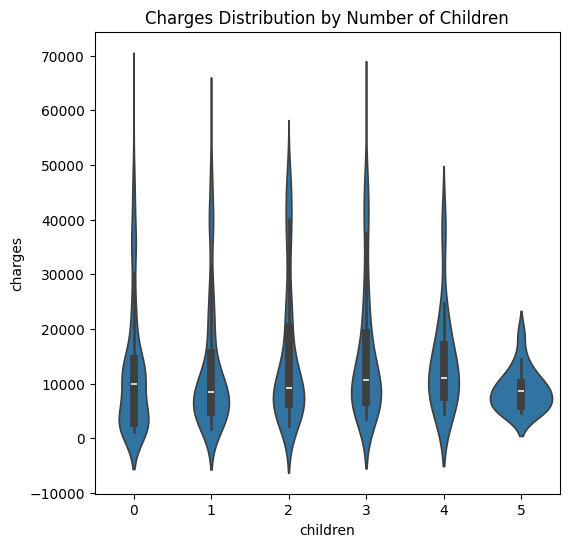

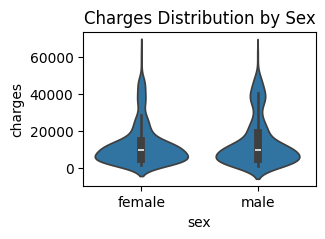

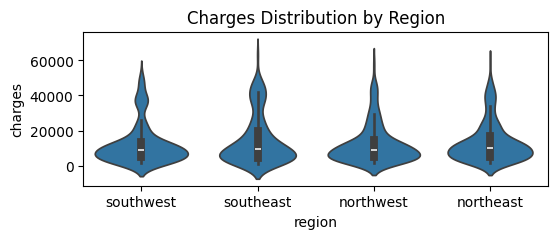

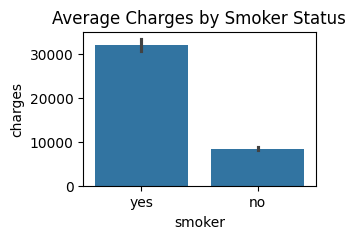

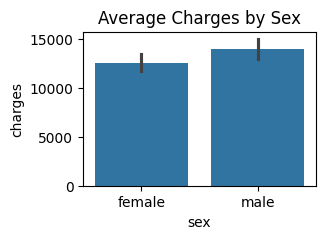

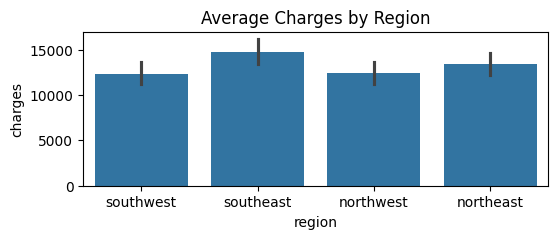

In [ ]:
# prompt: how charges column related to other columns using violin plots, and sns.barplots

# Use violin plots to visualize the relationship between charges and other columns
plt.figure(figsize=(6,6))
sns.violinplot(x='children', y='charges', data=df)
plt.title('Charges Distribution by Number of Children')
plt.show()

plt.figure(figsize=(3,2))
sns.violinplot(x='sex', y='charges', data=df)
plt.title('Charges Distribution by Sex')
plt.show()

plt.figure(figsize=(6,2))
sns.violinplot(x='region', y='charges', data=df)
plt.title('Charges Distribution by Region')
plt.show()


# Use bar plots to compare average charges across different categories
plt.figure(figsize=(3,2))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Average Charges by Smoker Status')
plt.show()

plt.figure(figsize=(3,2))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Average Charges by Sex')
plt.show()

plt.figure(figsize=(6,2))
sns.barplot(x='region', y='charges', data=df)
plt.title('Average Charges by Region')
plt.show()


### Smoker

In [ ]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
fig= px.histogram(df, x="smoker", color="sex", title="Smoker based on sex", marginal='box', color_discrete_sequence=['orange','grey'])
fig.update_layout(bargap=0.1)
fig.show()

## Correlation

\begin{align}
  r &= \frac{Σ (x_i - \bar{x})(y_i-\bar{y})}{\sqrt{Σ(x_i-\bar{x})^2 Σ(y_i-\bar{y})^2}}
\end{align}
<br>
<br>
\begin{align}
  r\hspace{0.5cm}&= \hspace{0.5cm}\text{correlation coefficient}
  \\
  x_i\hspace{0.5cm}&= \hspace{0.5cm}\text{values of the x-variable in a sample}
  \\
  \bar{x}\hspace{0.5cm}&= \hspace{0.5cm}\text{mean of the values of the x-variable}
  \\
  y_i\hspace{0.5cm}&= \hspace{0.5cm}\text{values of the y-variable in a sample}
  \\
  \bar{y}\hspace{0.5cm}&= \hspace{0.5cm}\text{mean of the values of the y-variable}
\end{align}

In [ ]:
df.charges.corr(df.age)

0.2990081933306476

In [ ]:
df.charges.corr(df.bmi)

0.19834096883362895

In [ ]:
df.charges.corr(df.children)

0.06799822684790478

In [ ]:
#We want to apply correlation to smoker also, although we know that there is relation between smoking and charges.
#Smoker is object type, and we can apply correlation over numerical values only.
#So we need to convert the categories to numeric.

#Using map()
smoker_values={'no':0, 'yes':1}
smoker_numeric=df.smoker.map(smoker_values)
smoker_numeric

df.charges.corr(smoker_numeric)


0.787251430498478

In [ ]:
#using function
def smoker_to_numeric(x):
    if x=='yes':
        return 1
    else:
        return 0

smoker_numeric=df.smoker.apply(smoker_to_numeric)
smoker_numeric

df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
def sex_to_numeric(x):
    if x=='female':
        return 1
    else:
        return 0

In [ ]:
df2=df.copy()

df2.sex=df2.sex.apply(sex_to_numeric)
df2.smoker=smoker_numeric
df2.drop('region', axis=1, inplace=True)
df2.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

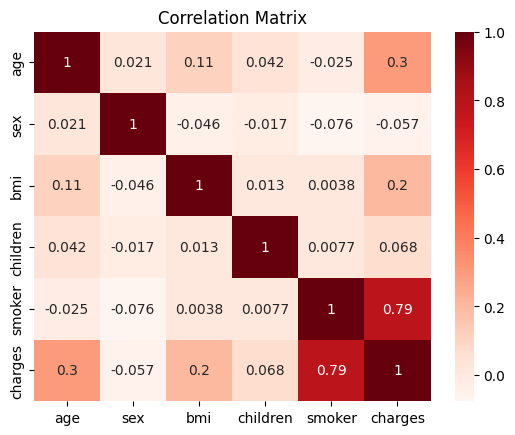

In [ ]:
sns.heatmap(df2.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

## Linear Regression using Single Feature for Non-smokers

In [23]:
def predict_charges(age, coef, intercept):
    return coef * age + intercept

def rmse(y,y_pred):
  return np.sqrt(np.mean(np.square(y-y_pred)))

def try_parameter(w,b):
  x= df[df.smoker=="no"].age
  y= df[df.smoker=="no"].charges
  y_pred= predict_charges(x,w,b)  #w=coeff, b=intercept

  loss=rmse(y,y_pred)
  print(f"RMSE Loss is {loss}")

  plt.plot(x,y_pred, 'r', alpha=0.9)
  plt.scatter(x,y,s=8, alpha=0.8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.title("Linear Regression")
  plt.legend(['Predicted','Actual'])
  plt.show()

RMSE Loss is 6859.035988601689


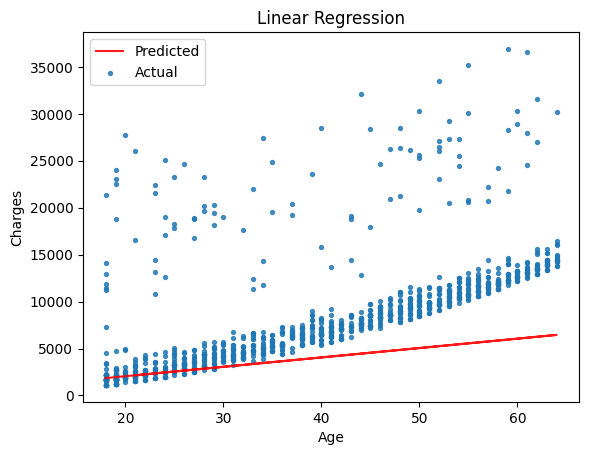

In [24]:
try_parameter(100,50)

RMSE Loss is 4705.696807404537


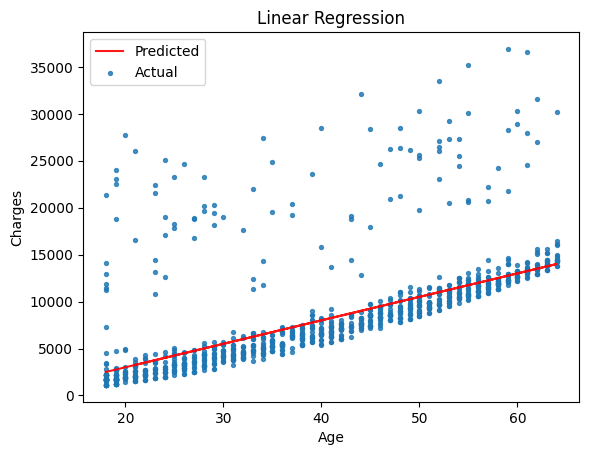

In [45]:
try_parameter(250,-2000)

### Optimizer

- Ordinary Least Square (better for smaller datasets)
- Stochastic Gradient Descent (better for larger datasets)

### Linera Regression using Sklearn

In [32]:
#imports
from sklearn.linear_model import LinearRegression

In [33]:
model= LinearRegression()

In [35]:
non_smoker_df= df[df.smoker=="no"]

x= non_smoker_df["age"]
y= non_smoker_df["charges"]

print(x.shape, y.shape)

(1064,) (1064,)


In [36]:
model.fit(x,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [37]:
x=non_smoker_df.age.values.reshape(-1,1)
y=non_smoker_df.charges.values.reshape(-1,1)

print(x.shape, y.shape)

(1064, 1) (1064, 1)


In [38]:
model.fit(x,y)

LinearRegression()

In [39]:
y_pred= model.predict(x)

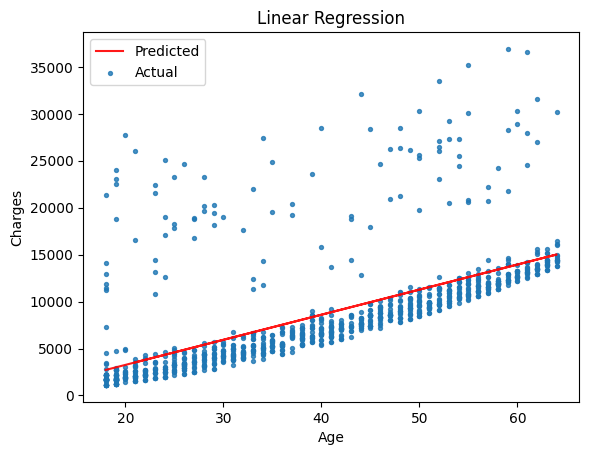

RMSE Loss  4662.505766636395


In [46]:
plt.plot(x,y_pred, 'r', alpha=0.9)
plt.scatter(x,y,s=8, alpha=0.8)
plt.legend(['Predicted','Actual'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Linear Regression")
plt.show()

print("RMSE Loss ", rmse(y,y_pred))

In [42]:
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficient:  [[267.24891283]]
Intercept:  [-2091.42055657]


### Now model with SGDRegressor

In [47]:
#imports
from sklearn.linear_model import SGDRegressor

In [61]:
max_iter=10_000
model2= SGDRegressor(loss="squared_error", max_iter=max_iter, penalty='l2')

In [58]:
model2.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=10000)

In [59]:
y_pred= model2.predict(x)

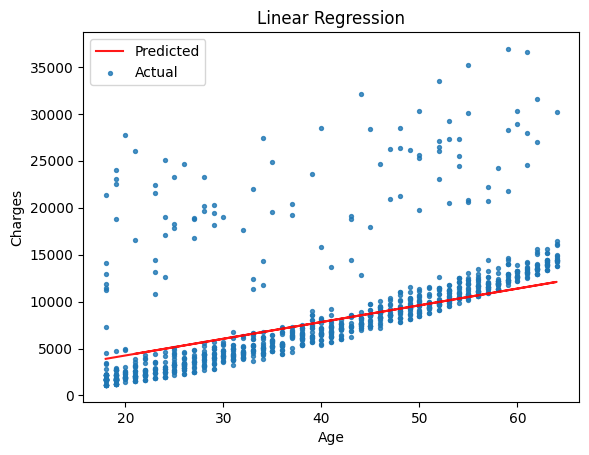

RMSE Loss after 10000 iterations: 6534.97611964646


In [63]:
plt.plot(x,y_pred, 'r', alpha=0.9)
plt.scatter(x,y,s=8, alpha=0.8)
plt.legend(['Predicted','Actual'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Linear Regression")
plt.show()

print("RMSE Loss after",max_iter,"iterations:", rmse(y,y_pred))

We can observe that Ordinary Least Square is performing better as the size of the data is small.

We could repeat the same for the Smokers also.